<a href="https://colab.research.google.com/github/muhammad-ahmad-github/learning-pytorch/blob/main/01_pytorch_workflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Workflow

Resoruces:
Let's explore an example PyTorch end-to-end workflow
Ground truth notebook- https://github.com/mrdbourke/pytorch-deep-learning/tree/main
Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/


In [1]:
what_were_covering = {1: "data (prepare and load)",
                    2: "build model",
                    3: "fitting the model to the data (training)",
                    4: "making predictions and evaluating a model (inference)",
                    5: "saving and loading a model",
                    6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn   # nn contains all of PyTorch building blocks for Neural Networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

## Data (preparing and loading)

Data can be almost anyting ... in machine learning.

* Excel spreadsheet
* Images of any king
* Videos (Youtube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of tow parts:
1 Get data into a numerical representation.
2. Build a model to learn patterns in the numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a strainght line wih known **parameters**.

In [3]:
# Create *known* parameters
# Weight and bias can be any here using an example

weight = 0.7
bias = 0.3

# Create
start = 0
end= 1
step = 0.02
X= torch.arange (start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

# printing some X and Y
# X[:3]   --  printing 1st 3 Index 0,1,2
# X[3:]   --  skiping 1st 3 and taking rest of X, Shiping Index 0,1,2
# X[48:]  --  skiping 1st 48 elements Index 48-1=47  --  hee Len(X) = 50  Index= 0-49
# X[49]   --  printing X[49] element i-e last element  index 0-49 len=50
# X[3:8] Range from Index 3-1=2 to 8-1=7

X[:3] , Y[3:8]

(tensor([[0.0000],
         [0.0200],
         [0.0400]]),
 tensor([[0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980]]))

In [4]:
len(X), len(Y)

(50, 50)

### Spliting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split] , Y[:train_split]
X_test , y_test = X[train_split:] , Y[train_split:]

len(X_train), len (y_train), len(X_test), len (y_test)
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

How might we better visualize our data?

In [12]:
def plot_predictions(train_data = X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions=None):
  """
  Plot training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

  # Are there prediction?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

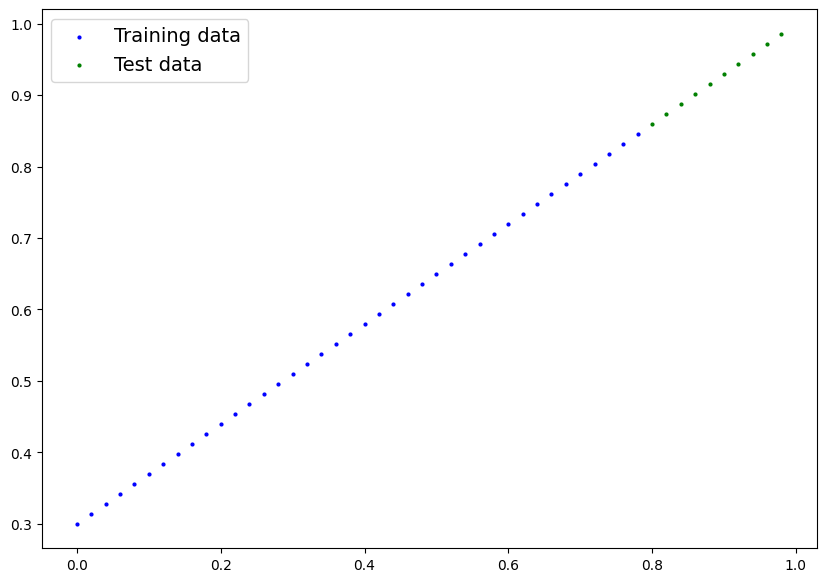

In [7]:
plot_predictions()

## 2. Build model

Our First Model

using OOP class

What our model does"
* Start with random values (weight & bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient decent
2. Backpropagation

In [8]:
from torch import nn

# Create linear regression model cloass
class LinearRegressionModel(nn.Module):                             # <- Almost everyting in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,                      # <- start with a random weight and try to adjust it to the ideal weights
                                            requires_grad = True,   # <- can this parameter be updated via Gradient Decent?
                                            dtype = torch.float))   # <- PyTorch default datatype torch.float32

    self.bias = nn.Parameter(torch.randn(1,                         # <- start with a random bias and try to adjust it to the ideal bias
                                         requires_grad = True,      # <- can this parameter be updated via Gradient Decent?
                                         dtype = torch.float))      # <- PyTorch default datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:             # <- "x" is the input data
    return self.weights * x + self.bias                           # this is the linear regression formula


### PyTorch model building essentials

* torch.nn - contains all of the building for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set this for us
* torch.nn.Module - The baase class for all neural network modules, If you sub-class it then you should overwrite forward ()
* torch.optim - this is where the optimizers in PyTorch lives, it will help with Gradient Decent
* def forward() - All nn.Module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation

In [9]:
# Playing with seed and randn

torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Checking the contents of our PyTorch model

Now we've created a model, let's see whats inside..

So we can checkout our model parameters or whats inside our model using .`parameters()`

In [10]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Model)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictiove power, let's see how it predicts y_test` based on `x_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [13]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [14]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [15]:
# Make predictions with model in inference mode.
# What inference mode does is that it turns off the Gradient tracking
# Because we are doing inference and NOT Training so we don't need Gradient here
# Makes execution Faster since we are not training here

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

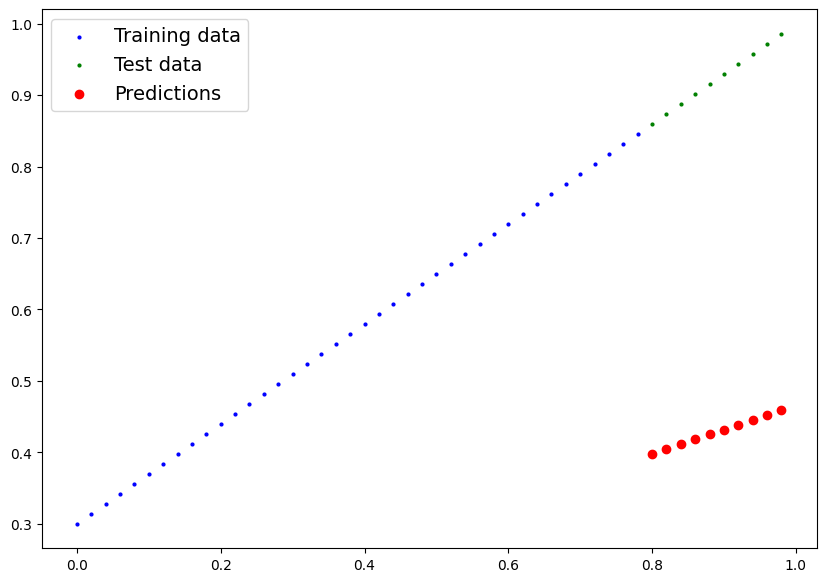

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
# Another way is torch.no_grad()

with torch.no_grad():
  y_pred = model_0(X_test)

y_pred

# However, inference mode is preffered

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## 3. Train Model

The whole idea of training is for a model to move from *unknown* parameters (these may be random) to some known prameters.

Or in other words from a poor representation of data to a better representation of data.

One way to measure how poor or how wrong your model predictions are is to use a loss function.

*Note: Loss function may also be called cost function or criterion in different areas.

Things we need to train:

* **Loss function:** A function to measure how wrong your model predictions are to the ideal output. Lower is better.
* **Optimizer:** Takes into account the loss of a model and adjust the model parameters (e.g weight & bias in our case) to improver the loss function.

  * `params` - the model parameters you'd like to optimize for example `params=model_0.parameters()`
  * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [18]:
list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [20]:
#Setup a loss function
loss_fn = nn.L1Loss()

# Setup an Optimizer (Stochastic Gradient Decent SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)                           #lr= learning rate = possibly the most important HYPERPARAMETER you can set

**Q:** Which loss fn and optimizer to use?

**A"** This will be problem specific.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
But for classification problem like classifying whether  photo of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (Binary Cross Entropy Loss).

### Building a training Loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass(this involves data moving through our model's forwards function(s) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels(.
3. Optimizer Zero Grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).

In [21]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a HYPERPARAMETER because we've set it )
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training

# 0. Loop through the data
for epoch in range(epochs):

  # Set the model to training mode
  model_0.train()       # train mode in PyTorch sets all paramaters that require Gradients to require Gradients

  # 1. Forwrd pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()      # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop


  ### Testing

  model_0.eval()                      # turns off different setting in the model not needed for evaluation/testing (Dropout/ BatchNorm)

  with torch.inference_mode():        # turn off gradient tracking & a couple more things behind the scene
  #with torch.no_grad():              # you may also see in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print (f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # PRint out model state_dict()
    #print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
weight, bias

(0.7, 0.3)

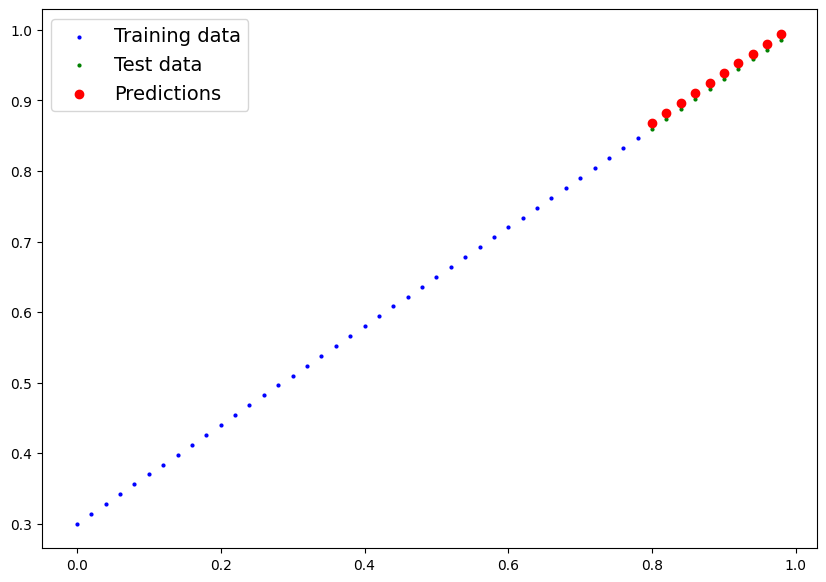

In [27]:
plot_predictions(predictions=y_preds_new);

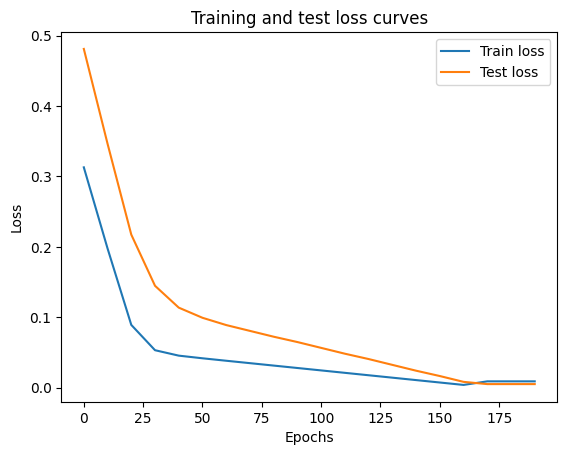

In [28]:
# Plot the loss curves
import numpy as np
#these values are tensors and plt works with np arrays so convert them
#np.array(torch.tensor(loss_values).numpy())

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## Saving a model in Pytorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python Pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

In [29]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [30]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Aug 31 07:08 01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model. We'll create a new instance of our model class and load the saved `state_dict()` into that.

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# To load in a saved state_dict() we have to instintiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() of model_0 () this will update the new instance with updated parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [33]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [34]:
# Make some preditions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [35]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [36]:
# Compare loaded model preds with original model preds
y_preds  == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back throughthe steps above and see it all one place

In [30]:
# Import PyTorch and matlibplot
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU.

In [31]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [32]:
# Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step= 0.02

# Create X and y (features and labels)
X = torch.arange(start , end , step).unsqueeze(dim=1) # without unsreeze, error will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split data

train_split = int (0.8 * len(X))
X_train , y_train = X [:train_split], y[:train_split]
X_test, y_test = X[train_split:] , y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [34]:
def plot_predictions(train_data = X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions=None):
  """
  Plot training data, test data and compare predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  # Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

  # Are there prediction?
  if predictions is not None:
    # Plot the predictions if they exists
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})

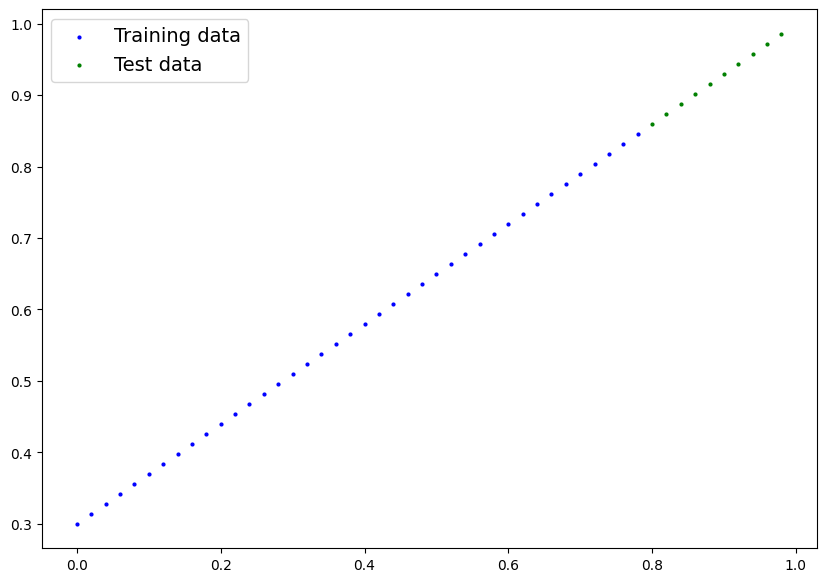

In [35]:
#Plot the data
plot_predictions(X_train,y_train,X_test,y_test)

## 6.2 Building a PyTorch Linear Model

In [36]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameter/ also called: linear transformer, probing layer, fully connected layer, dense layer
    # Here we don't init parameters rather we init LAYERS using built-in feature of PyTorch
    self.linear_layer = nn.Linear(in_features=1,       # Since X and y are 1-to-1 so in=1 and out=1
                                  out_features=1)     # it basically implements y=x.A(transpose) + b

  def forward(self, x: torch.Tensor) -> torch.Tensor:     # self, x(a torch Tensor)  -> (means it outputs) a torch Tensor
    return self.linear_layer(x)

# Set the manul seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss Function
* Optimizer
* Trainijg loop
* Testing loop

In [39]:
# setup the loss function
loss_fn= nn.L1Loss()   # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [41]:
# Let's write a training loop
torch.manual_seed(42)

epochs= 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward_pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn (y_pred, y_train)

  # 3. Otimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn (test_pred, y_test)

  # Print out wht's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test_loss: {test_loss}")

Epoch: 0 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 10 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 20 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 30 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 40 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 50 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 60 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 70 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 80 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 90 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 100 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 110 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 120 | Loss: 0.0012645035749301314 | Test_loss: 0.013801807537674904
Epoch: 130 | Loss: 0.001264503574930

In [42]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
### 6.4 Making and evaluation predictions

In [45]:
# Turn model into eval mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

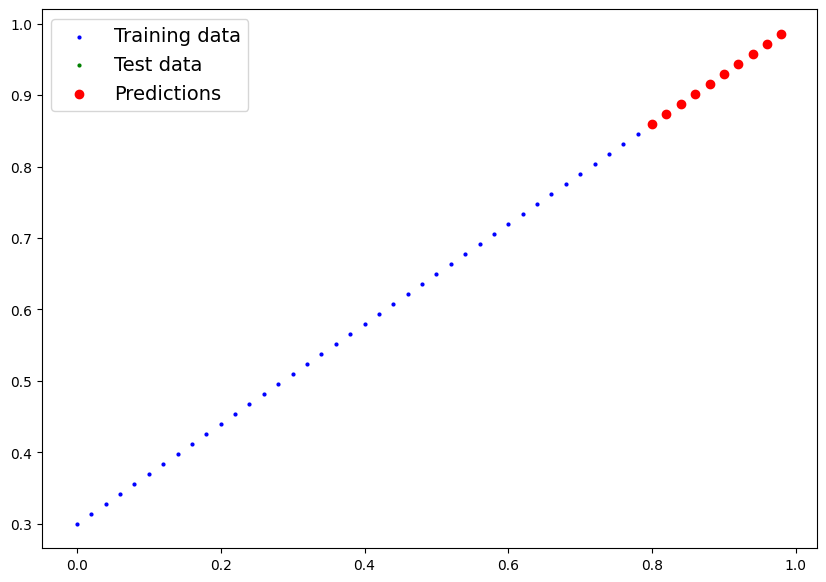

In [46]:
# Check out our model predicitons  visually
plot_predictions(predictions=y_preds)

### 6.5 Saving ^ Loading a trained model

In [48]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. sAVE THE MODEL STATE DICT
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to : models/01_pytorch_workflow_model_1.pth


In [49]:
# Load a PyTorch

# Create a new instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [50]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [51]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [52]:
# Evaluate the prediction of loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds== loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])